In [6]:
import pandas as pd
import numpy as np

# Create dummy data
np.random.seed(0)
n_samples = 200
age = np.random.randint(18, 70, size=n_samples)
income = np.random.randint(20000, 100000, size=n_samples)

# Create a DataFrame
data = pd.DataFrame({'Age': age, 'Income': income})

# Save the data to a CSV file
data.to_csv('customer_data.csv', index=False)


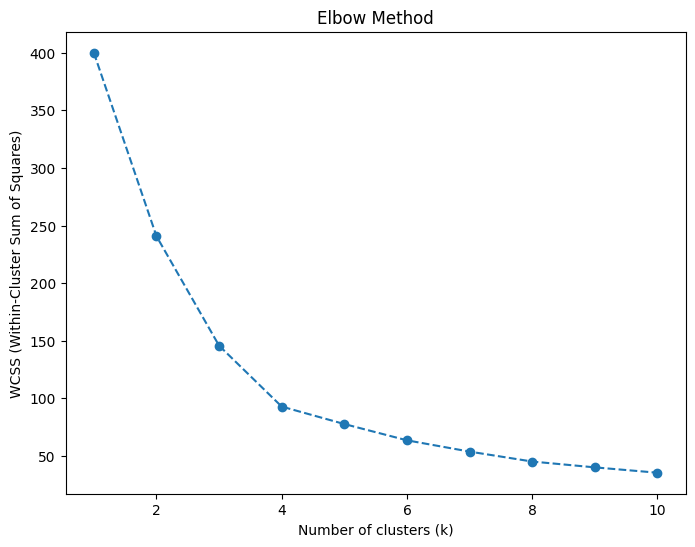

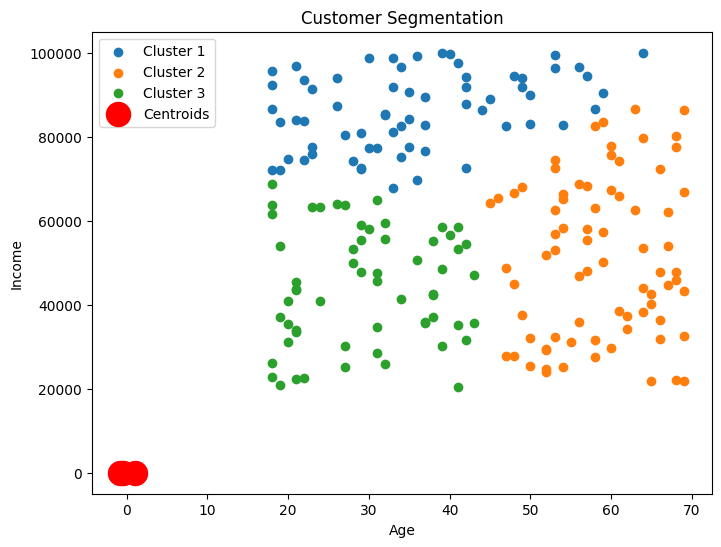

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('customer_data.csv')

# Select the columns for clustering
selected_columns = data[['Age', 'Income']]

# Standardize the data (important for K-means clustering)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_columns)

# Determine the optimal number of clusters using the Elbow Method
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Based on the Elbow Method, choose the optimal value of k
k = 3  # You can choose based on the Elbow Method result

# Perform K-means clustering with the chosen k
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the DataFrame
data['Cluster'] = clusters

# Visualize the clusters using a scatter plot
plt.figure(figsize=(8, 6))
for cluster in range(k):
    plt.scatter(data[data['Cluster'] == cluster]['Age'],
                data[data['Cluster'] == cluster]['Income'],
                label=f'Cluster {cluster + 1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()


C:\Users\Deep Salunkhe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


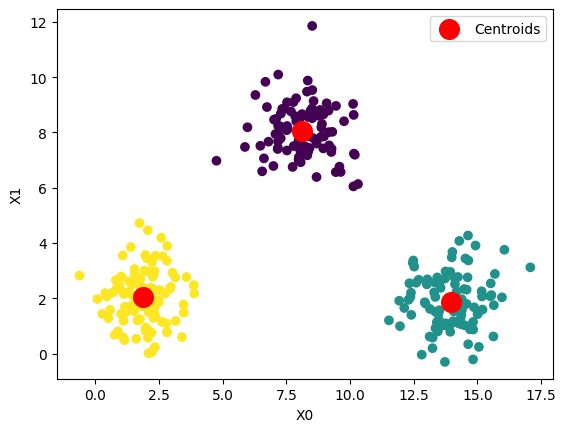

Cluster Centroids:
[[ 8.12824872  8.04348765]
 [13.95496261  1.87372732]
 [ 1.88443575  2.03402232]]


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate random data with different distribution
n_samples = 300
n_features = 2
centers = [(2, 2), (8, 8), (14, 2)]  # Define the centers for the clusters
cluster_std = 1.0  # Adjust the standard deviation to control cluster spread
random_state = 42

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, cluster_std=cluster_std, random_state=random_state)

# Fit K-means clustering on the new data
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centroids = kmeans.cluster_centers_

# Create a DataFrame for visualization
df = pd.DataFrame({'X0': X[:, 0], 'X1': X[:, 1], 'Cluster': y_kmeans})

# Visualize the clusters and centroids
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', label='Centroids')
plt.xlabel('X0')
plt.ylabel('X1')
plt.legend()
plt.show()

# Print cluster centroids
print("Cluster Centroids:")
print(centroids)
